## Tasca M7 T01 Algoritmes Aprenentatge Supervisat: Classificació


- **Exercici 1**

    - Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.


- **Exercici 2**

    - Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades


- **Exercici 3**

    - Entrena’ls utilitzant els diferents paràmetres que admeten per intentar millorar-ne la predicció.


- **Exercici 4**

    - Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation..


- **Exercici 5**

    - Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

In [1]:
# Import basic required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
import seaborn as sns 


In [34]:
# Import necessary modules
from scipy import stats ## to check normality and variance of columns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.preprocessing import LabelEncoder ## for xgbooster is necessary that some features are encvoded

## Importn Classification models
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier ## K-nearest neigbours
from sklearn import svm ## Super vector Machine
from sklearn.svm import SVC 
import xgboost as xgb ## XGBoost
from sklearn.naive_bayes import GaussianNB

# To evaluate the models performance
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from pandas.plotting import scatter_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

## Hyper-Parameter tuning & Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# For ploting several model options
from matplotlib import pyplot
from pprint import pprint ## To plot trees

<div class="alert alert-success h2" role="alert">
    <b>Descarrega i pre-processat de les dades</b>
</div>

In [3]:
df = pd.read_csv('wineData.txt', header=None)
df

0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17  1185  
3    3.45  1480  
4    2.93   735  
..    ...   ...  
173  1.74   740  
174  1.56   750  
175  1.56   835  
176  1.62   840  
177  1.60   560  

[178 rows x 14 columns]

The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it):
- 0) Classes - Target column
- 1) Alcohol
- 2) Malic acid
- 3) Ash
- 4) Alcalinity of ash  
- 5) Magnesium
- 6) Total phenols
- 7) Flavanoids
- 8) Nonflavanoid phenols
- 9) Proanthocyanins
- 10) Color intensity
- 11) Hue
- 12) OD280/OD315 of diluted wines
- 13) Proline            

In [4]:
col_names = ['Classes', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols',
             'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']
df.columns =  col_names 


In [8]:
df.describe().round(3).T

count     mean      std     min      25%  \
Classes                       178.0    1.938    0.775    1.00    1.000   
Alcohol                       178.0   13.001    0.812   11.03   12.362   
MalicAcid                     178.0    2.336    1.117    0.74    1.602   
Ash                           178.0    2.367    0.274    1.36    2.210   
AlcalinityOfAsh               178.0   19.495    3.340   10.60   17.200   
Magnesium                     178.0   99.742   14.282   70.00   88.000   
TotalPhenols                  178.0    2.295    0.626    0.98    1.742   
Flavanoids                    178.0    2.029    0.999    0.34    1.205   
NonflavanoidPhenols           178.0    0.362    0.124    0.13    0.270   
Proanthocyanins               178.0    1.591    0.572    0.41    1.250   
ColorIntensity                178.0    5.058    2.318    1.28    3.220   
Hue                           178.0    0.957    0.229    0.48    0.782   
OD280/OD315_of_diluted_wines  178.0    2.612    0.710    1.27    1.938   
Proline                       178.0  746.893  314.907  278.00  500.500   

                                  50%      75%      max  
Classes                         2.000    3.000     3.00  
Alcohol                        13.050   13.678    14.83  
MalicAcid                       1.865    3.082     5.80  
Ash                             2.360    2.558     3.23  
AlcalinityOfAsh                19.500   21.500    30.00  
Magnesium                      98.000  107.000   162.00  
TotalPhenols                    2.355    2.800     3.88  
Flavanoids                      2.135    2.875     5.08  
NonflavanoidPhenols             0.340    0.438     0.66  
Proanthocyanins                 1.555    1.950     3.58  
ColorIntensity                  4.690    6.200    13.00  
Hue                             0.965    1.120     1.71  
OD280/OD315_of_diluted_wines    2.780    3.170     4.00  
Proline                       673.500  985.000  1680.00

In [5]:
df.isnull().sum()

Classes                         0
Alcohol                         0
MalicAcid                       0
Ash                             0
AlcalinityOfAsh                 0
Magnesium                       0
TotalPhenols                    0
Flavanoids                      0
NonflavanoidPhenols             0
Proanthocyanins                 0
ColorIntensity                  0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

In [6]:
df.isna().sum()

Classes                         0
Alcohol                         0
MalicAcid                       0
Ash                             0
AlcalinityOfAsh                 0
Magnesium                       0
TotalPhenols                    0
Flavanoids                      0
NonflavanoidPhenols             0
Proanthocyanins                 0
ColorIntensity                  0
Hue                             0
OD280/OD315_of_diluted_wines    0
Proline                         0
dtype: int64

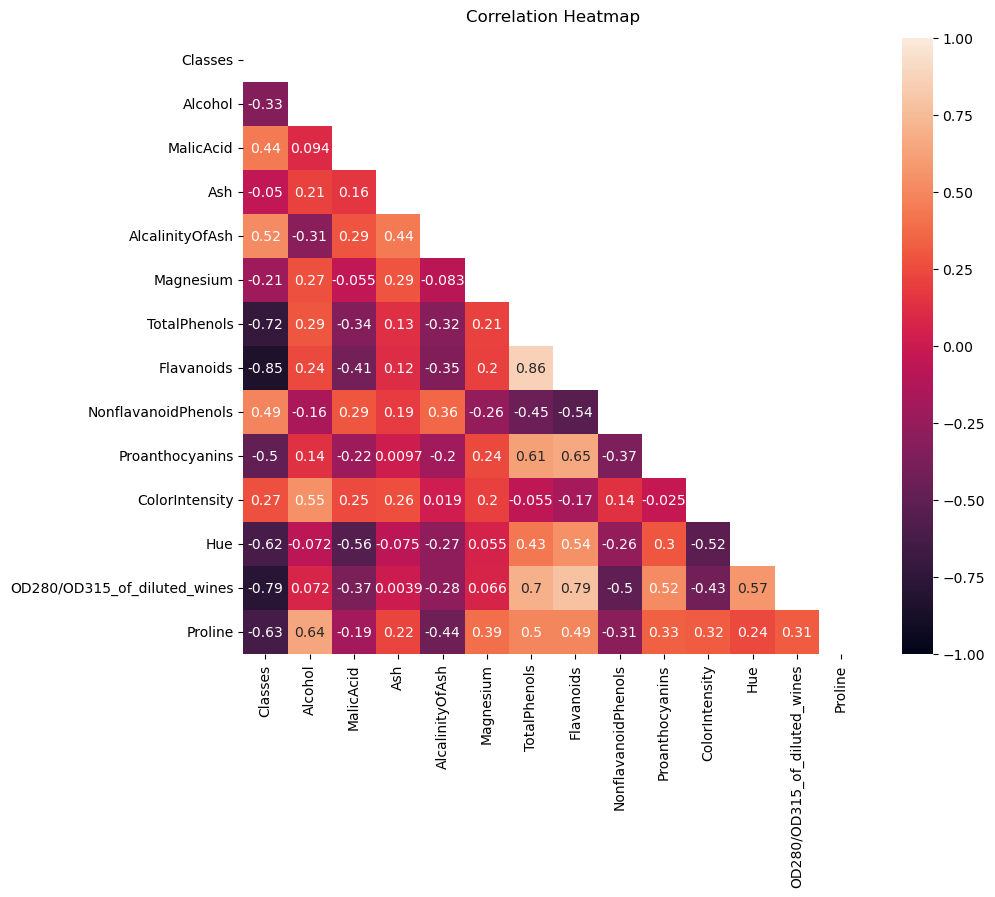

In [9]:
##Figure size:
plt.figure(figsize=(10,8))

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr()))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True);
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

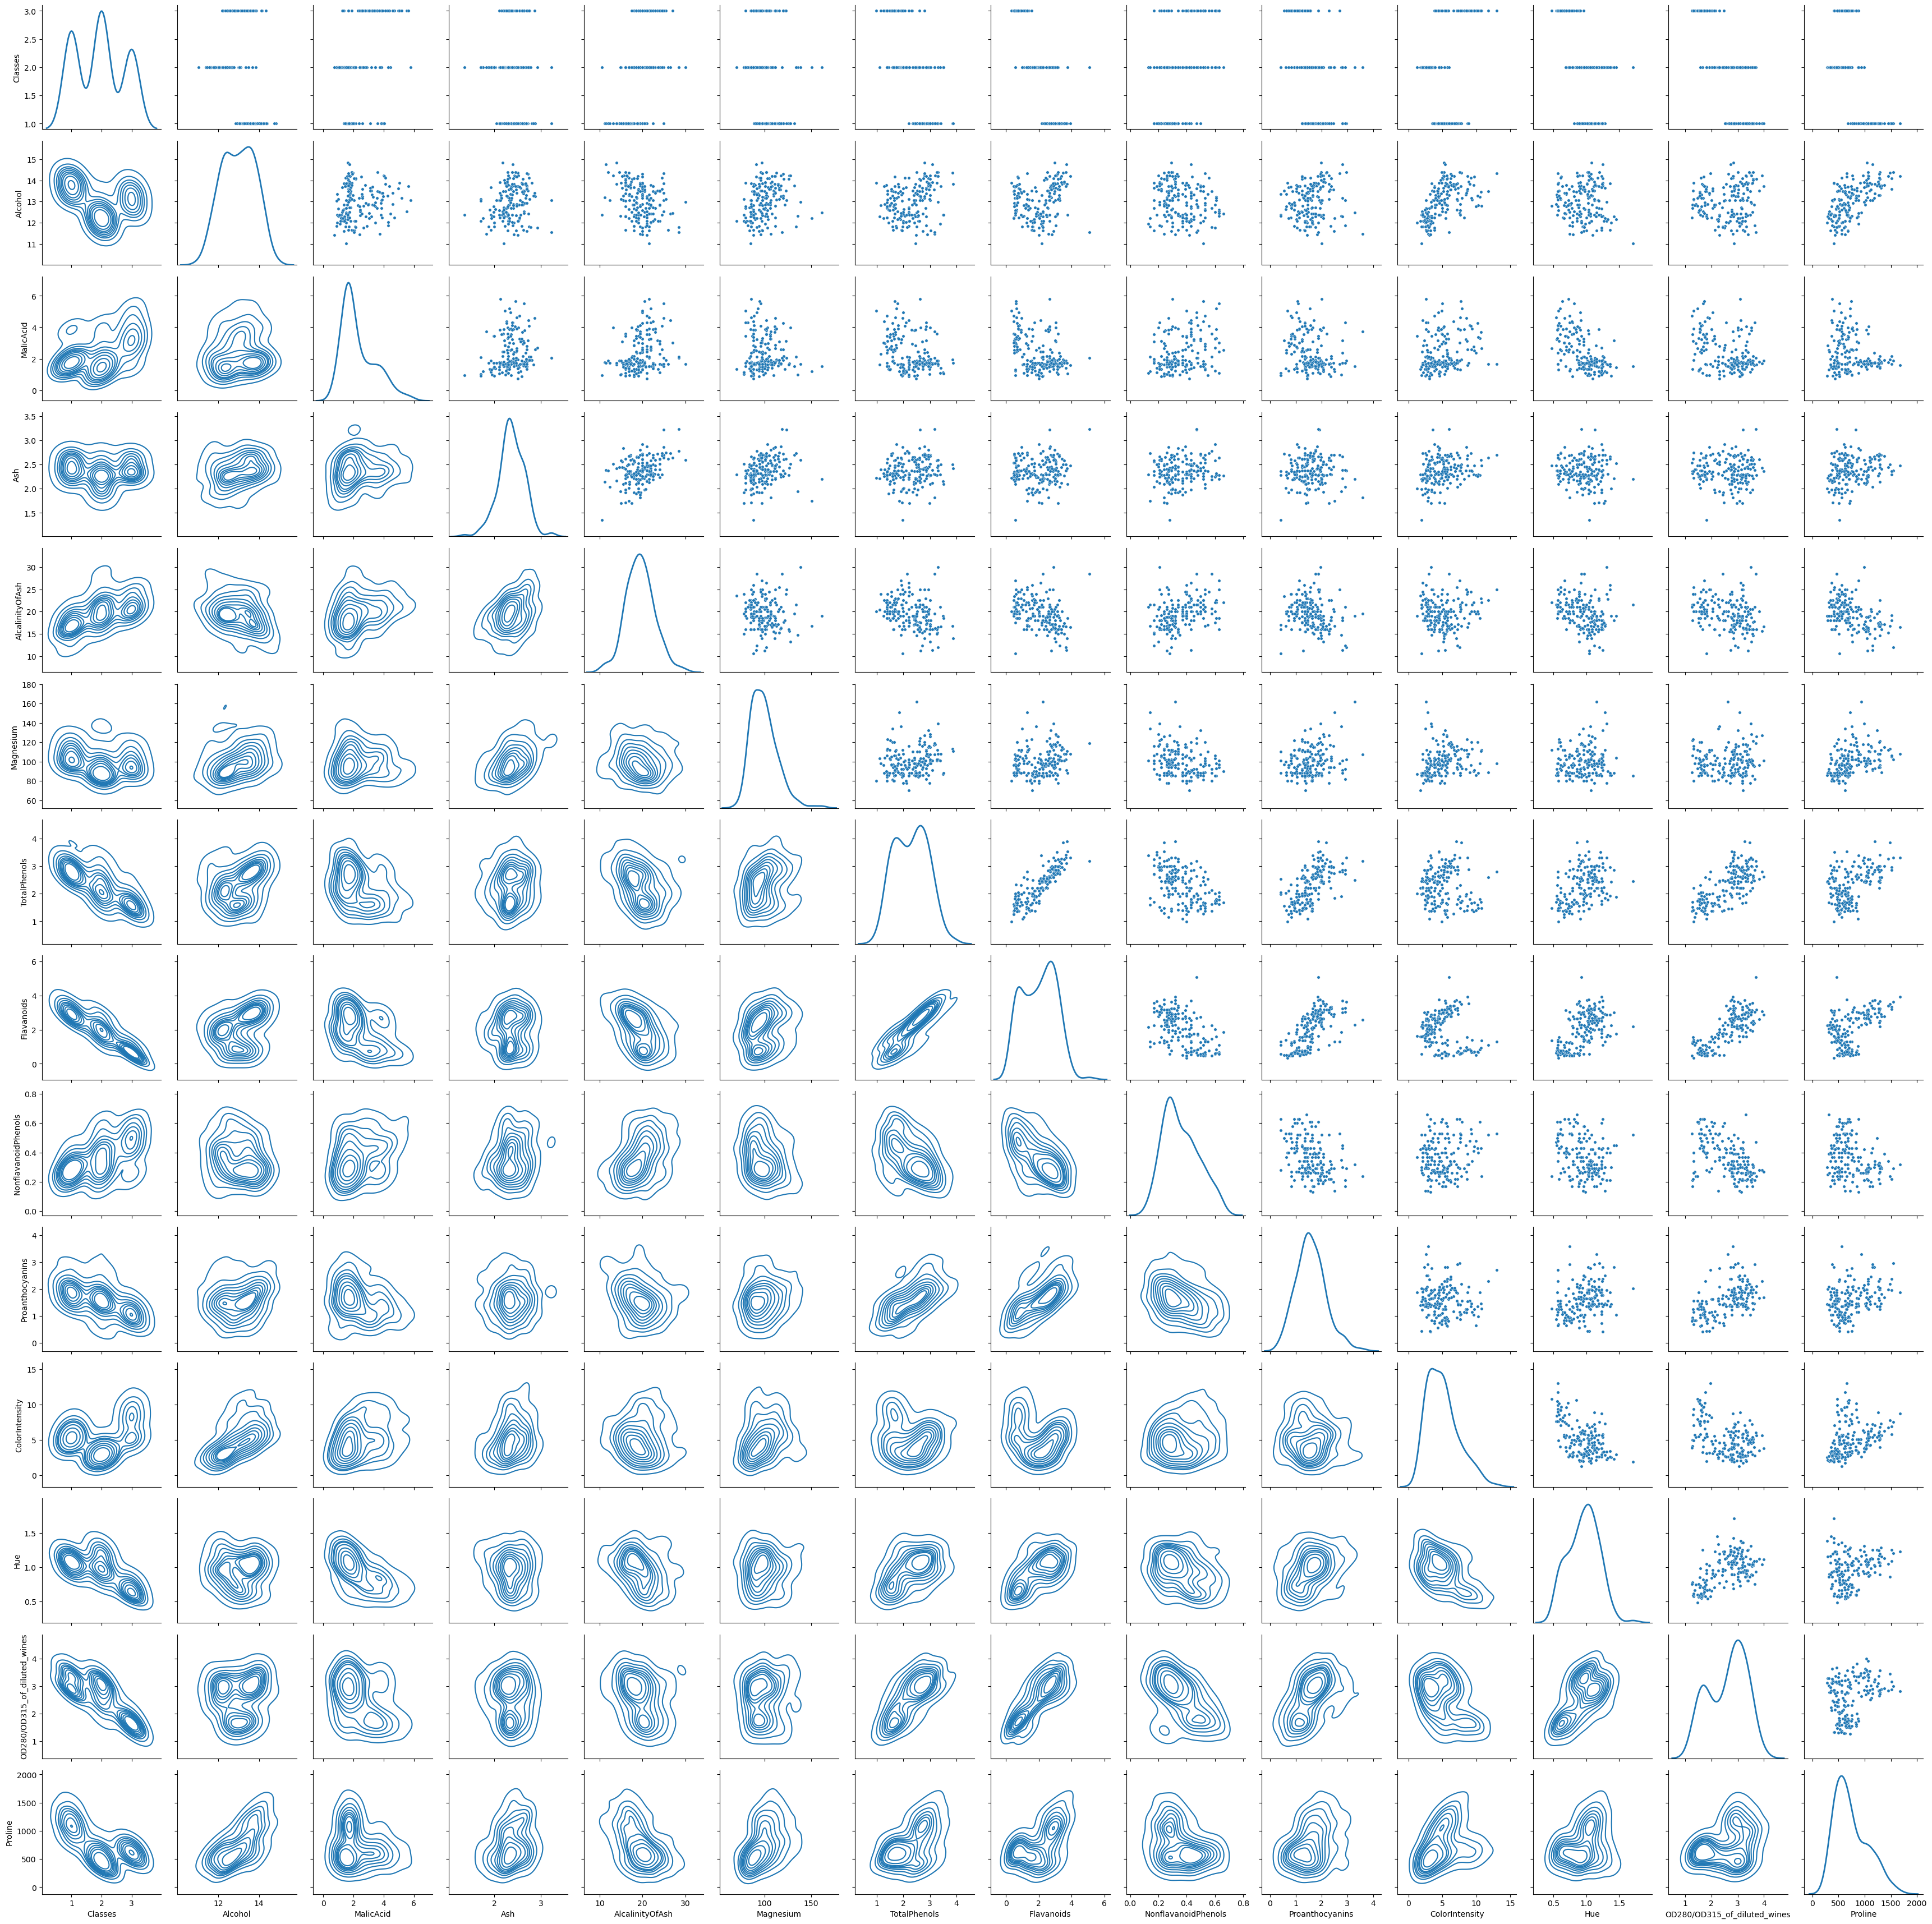

In [10]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

plt.savefig('DensityCorrelationGrid_Allvariables.jpg')
plt.show()

In [11]:
# Define a function to check normality
## For checking normality, I used Shapiro-Wilk’s W test which is generally preferred for 
## smaller samples however there are other options like Kolmogorov-Smirnov and D’Agostino and Pearson’s test. 
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    #print("p value:%.6f" % p_value_normality)
    if p_value_normality <0.05:
        text  = "Reject null hypothesis >> The data is not normally distributed"
        ##print("Reject null hypothesis >> The data is not normally distributed")
    else:
        text = "Fail to reject null hypothesis >> The data is normally distributed"
        ##print("Fail to reject null hypothesis >> The data is normally distributed")
    return text, p_value_normality
        
## Define a function to check variance
## For checking variance homogeneity, I preferred Levene’s test  
## but you can also check Bartlett’s test
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var = stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        text = "Reject null hypothesis >> The variances of the samples are different."
        ##print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        text = "Fail to reject null hypothesis >> The variances of the samples are same."
        ##print("Fail to reject null hypothesis >> The variances of the samples are same.")
    return text, p_value_var

##Function to plot the distribution and a boxplot for each column with a loop
#Introduce the df, df[['CRIM', 'ZN']]
##It alsdo includes in the plot the normality test
def plotsPreProcessing(df):
    for column in df:
        text = check_normality(df[column])
        fig, axes = plt.subplots(1,2, figsize = (15,5))
        fig.suptitle('OUTLIERS AND DISTRIBUTION OF COLUMN' + '\n\n' + text[0] + '   p_value =' + str(round(text[1], 4)))
        sns.histplot(ax=axes[1], data=df, x=df[column], bins=15, color='orange', kde= True)
        sns.boxplot(ax=axes[0], x =df[column])

    

<div class="alert alert-success h2" role="alert">
    <b>Pre-processat de les dades</b>
</div>

- Aquí plotejare totes les dades amb un box plot i una distribució, així com fer-li el test de normalitat amb la funció creada a dalt, per tal de veure com són i quin pre-processat haig d'aplicar a cadascun dels features.
- També plotejo elmtarget per veure que tenim i la seva distribució

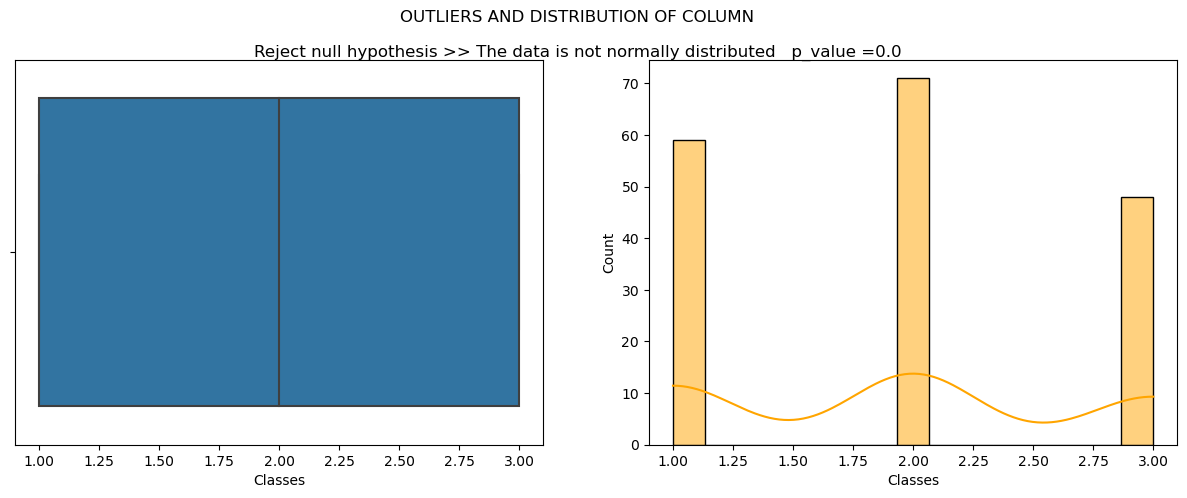

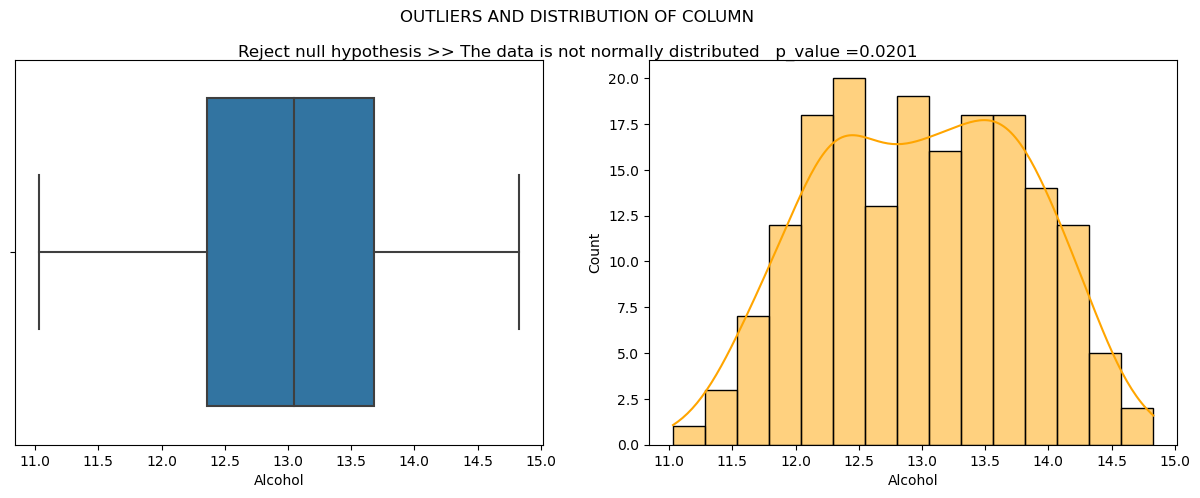

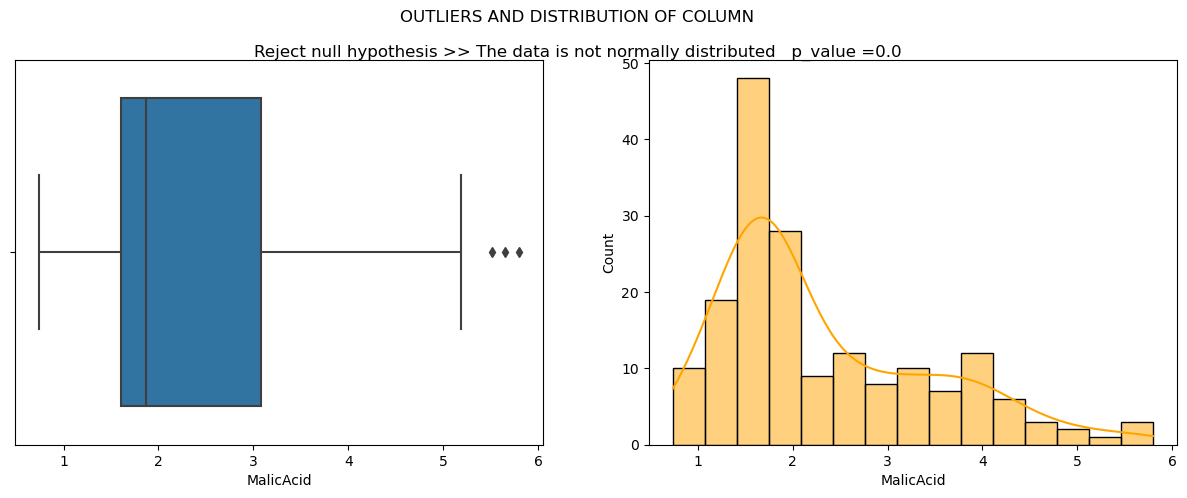

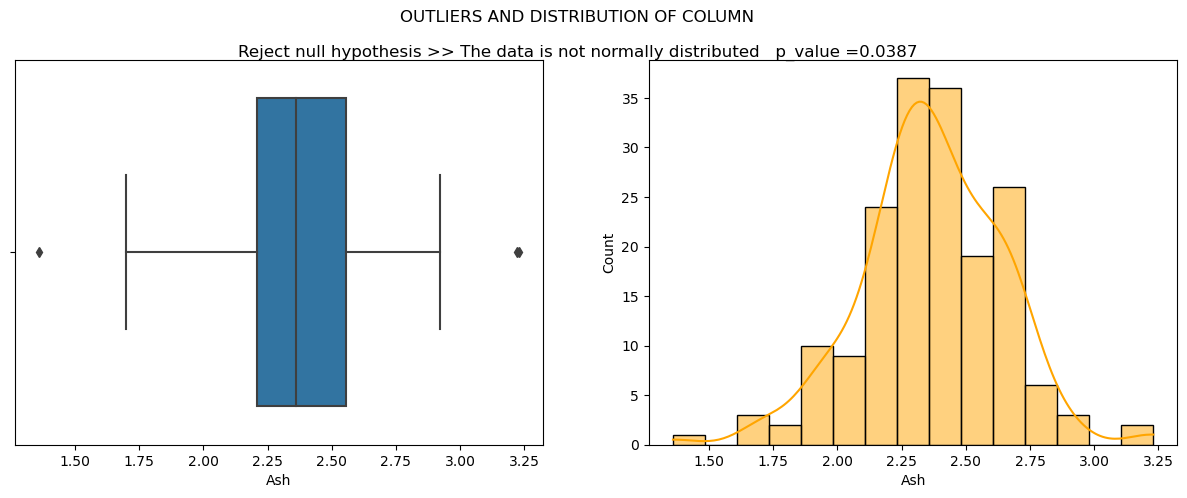

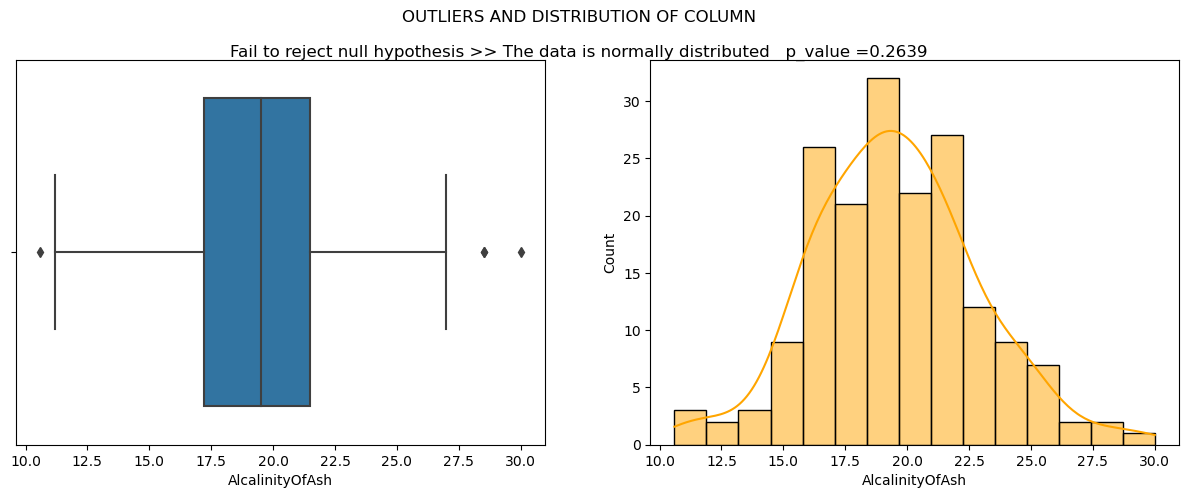

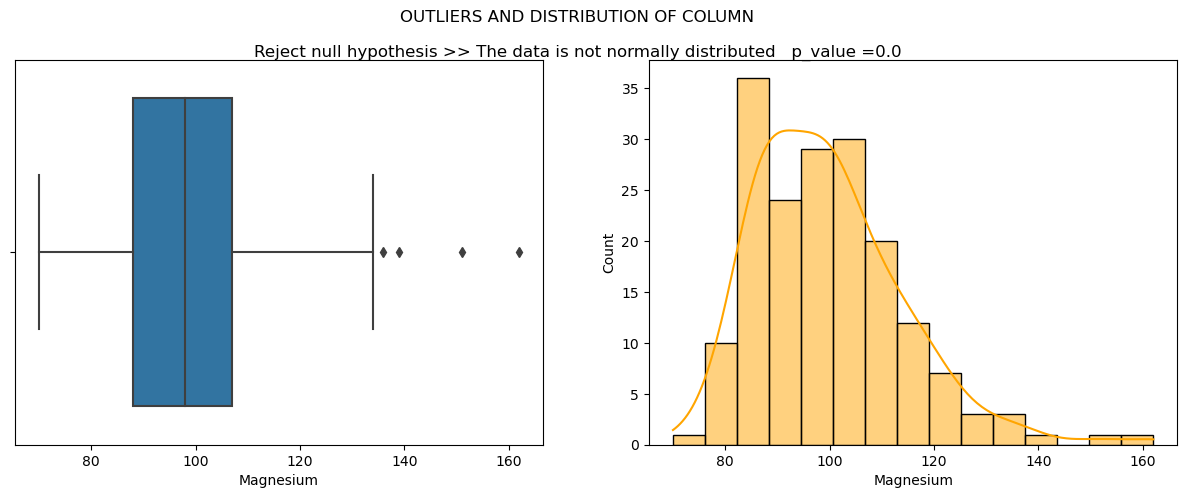

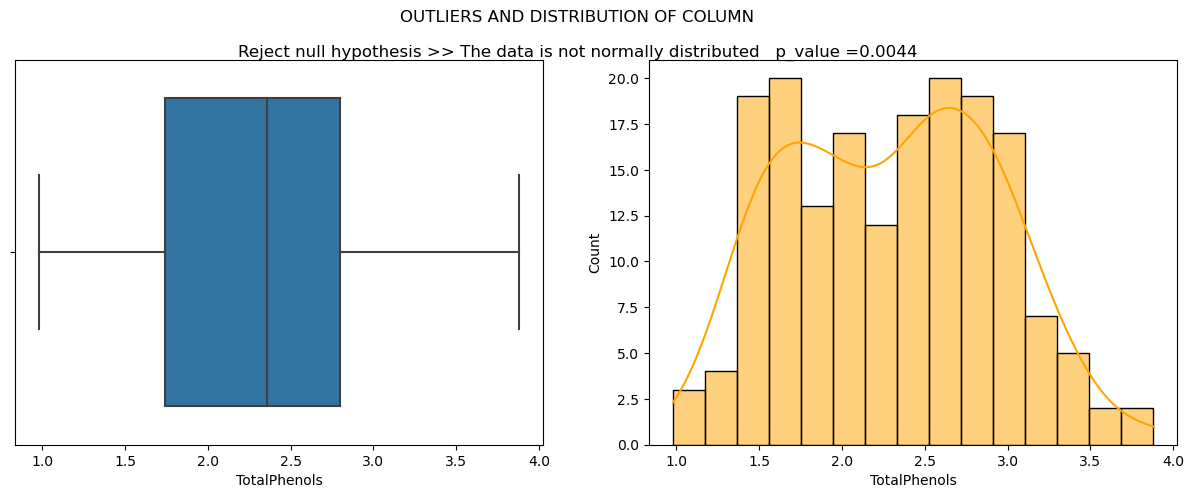

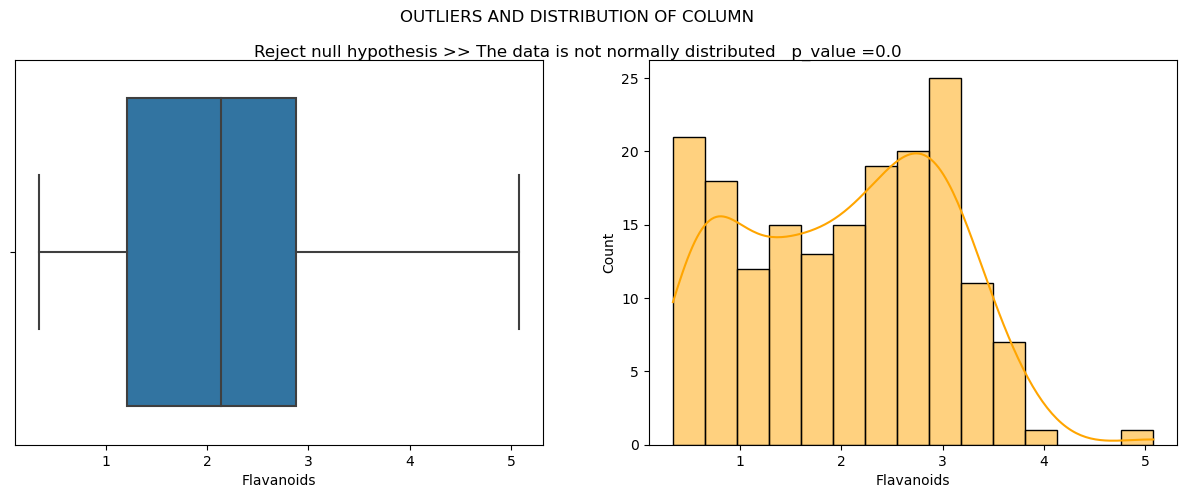

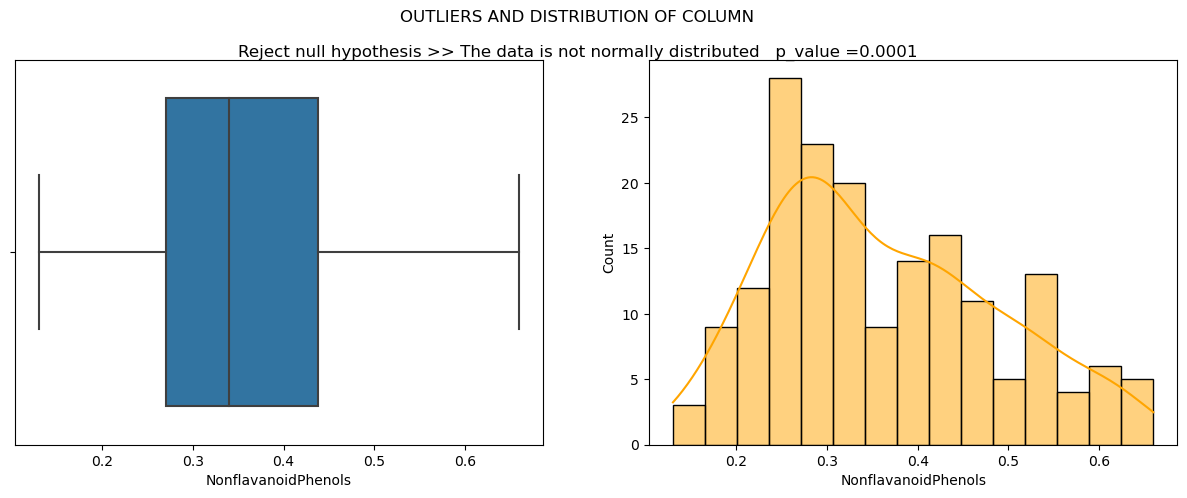

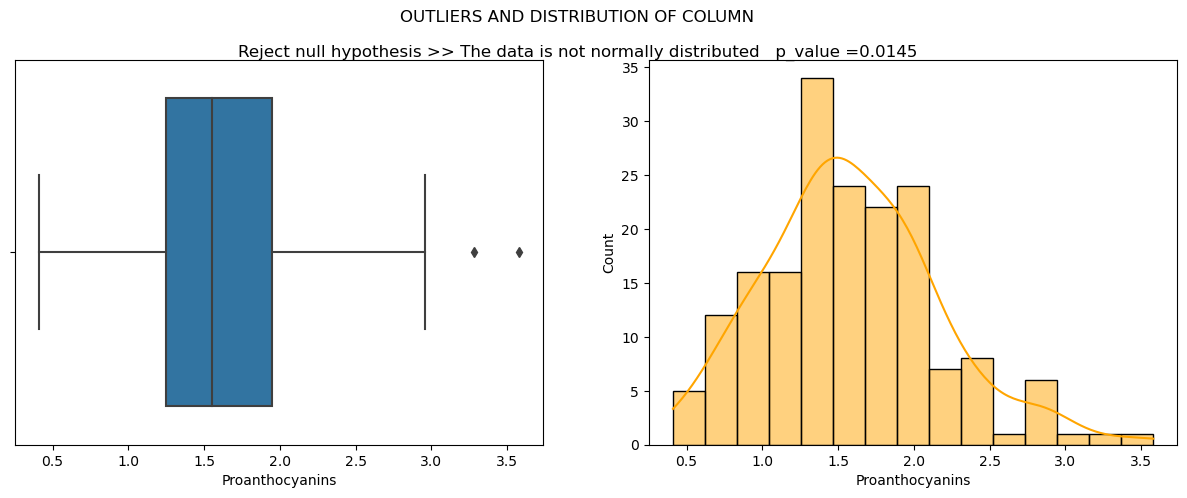

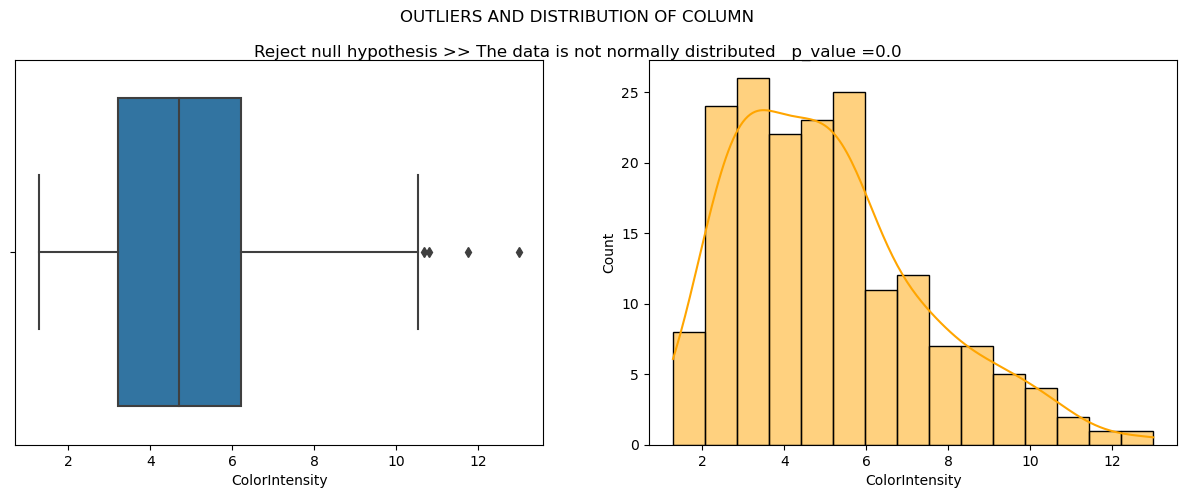

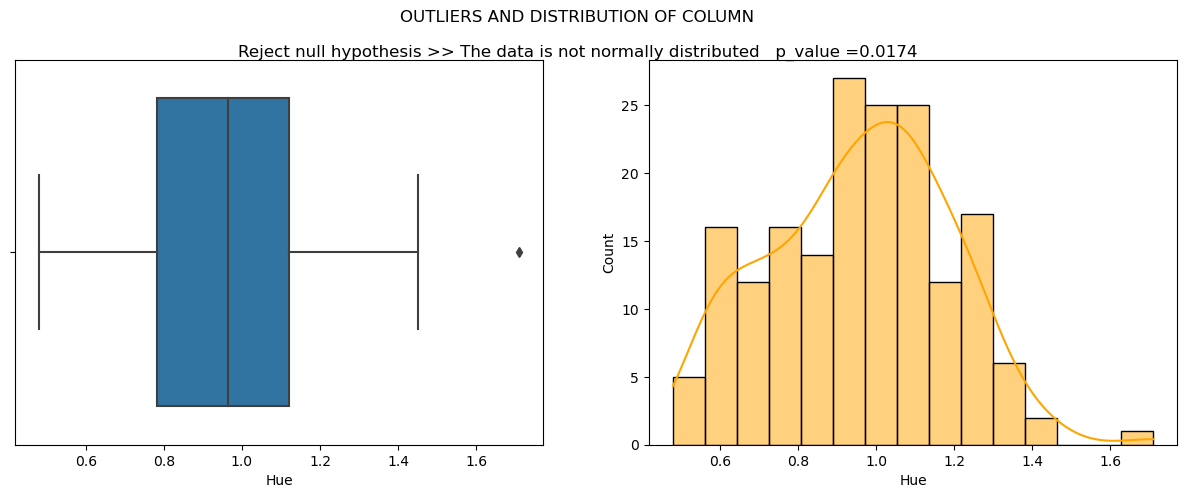

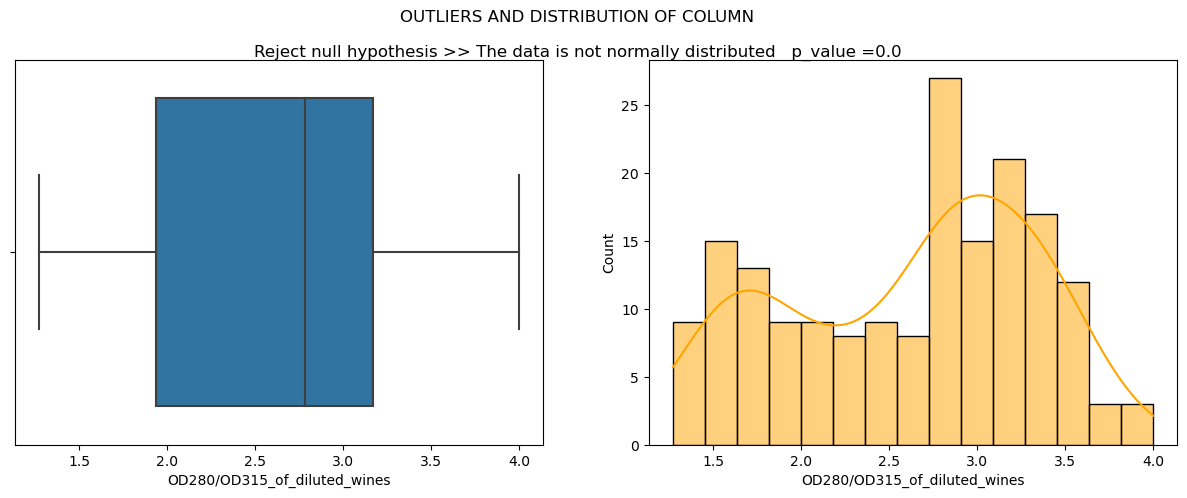

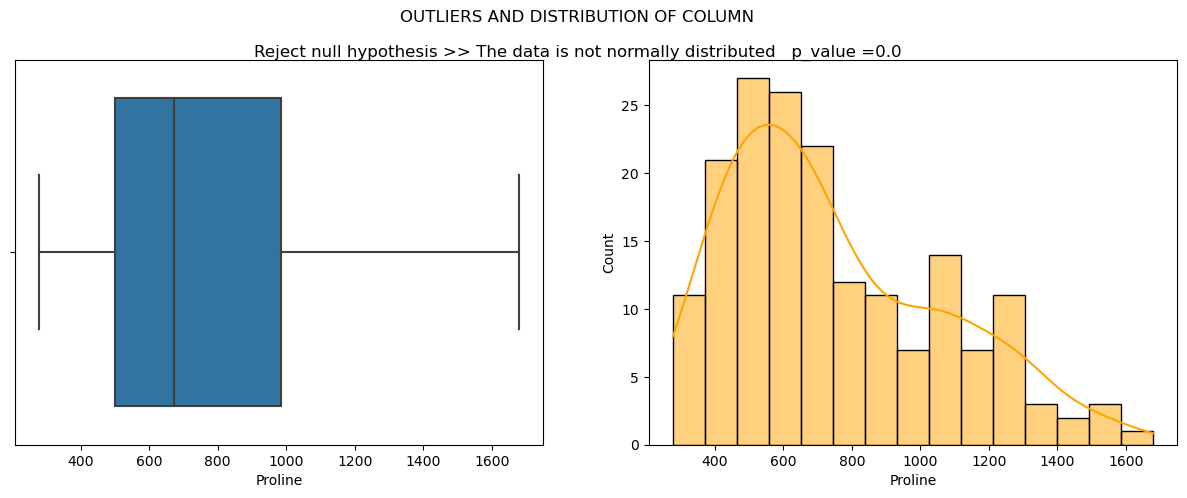

In [12]:
plotsPreProcessing(df)

- Plotejo també quins són els valors maxims i minims de cada columna per veure quins son els rangs actuals

In [13]:
## Look the min and max values for each feature and class
df.describe().loc[['min', 'max']].T

min      max
Classes                         1.00     3.00
Alcohol                        11.03    14.83
MalicAcid                       0.74     5.80
Ash                             1.36     3.23
AlcalinityOfAsh                10.60    30.00
Magnesium                      70.00   162.00
TotalPhenols                    0.98     3.88
Flavanoids                      0.34     5.08
NonflavanoidPhenols             0.13     0.66
Proanthocyanins                 0.41     3.58
ColorIntensity                  1.28    13.00
Hue                             0.48     1.71
OD280/OD315_of_diluted_wines    1.27     4.00
Proline                       278.00  1680.00

- Separo el dataset en lez features (X) i el target (y), per tal d'aplicar el processat a les features
- i en train i test  perque en algunes parts del processat no volem ensenyar-li les dades del test

- A vegades hi ha columnes que tenim dubtes si posar-les en el grup amb outliers o el de normalització. En aquests casos el que podriem fer, és testejar rapid un model amb les dades en un grup i un model amb les dades a l'altre grup, i comparar en quin dels 2 casos funciona millor.

In [14]:
X = df[['Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols',
             'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315_of_diluted_wines', 'Proline']]
y = df['Classes']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

- De les grafiques i el test de normalitat anteriors, he separat les columnes segons el pre-processat que necessiten

In [16]:
numeric_gaussian = ['AlcalinityOfAsh']

numeric_Not_gaussian = ['Alcohol', 'TotalPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'OD280/OD315_of_diluted_wines', 'Proline']

numeric_outliers = ['MalicAcid', 'Ash', 'Magnesium', 'Proanthocyanins', 'ColorIntensity', 'Hue']

- El pre-processat doncs el faig principalment al train i test sets, però el fit el faig nomès en el train set

In [17]:
## Standariztion
# Fit only on X_train
scaler = preprocessing.StandardScaler().fit(X_train[numeric_gaussian])
X_train[numeric_gaussian] = scaler.transform(X_train[numeric_gaussian])
# Scale both X_train and X_test
X_test[numeric_gaussian] = scaler.transform(X_test[numeric_gaussian])

## Normalization withOUT outliers
transformer = preprocessing.Normalizer() ## Normalizer is the same as MinMax()
X_train[numeric_Not_gaussian] = transformer.fit_transform(X_train[numeric_Not_gaussian])
X_test[numeric_Not_gaussian] = transformer.fit_transform(X_test[numeric_Not_gaussian])

## Normalization with outliers
transformer = preprocessing.RobustScaler()
X_train[numeric_outliers] = transformer.fit_transform(X_train[numeric_outliers])
X_test[numeric_outliers] = transformer.fit_transform(X_test[numeric_outliers])
X_train

Alcohol  MalicAcid       Ash  AlcalinityOfAsh  Magnesium  TotalPhenols  \
138  0.023252   1.104575 -0.557377         0.000000  -0.487805      0.002792   
104  0.018612  -0.111111 -1.245902         0.288180  -0.634146      0.003273   
78   0.016438  -0.594771 -1.344262        -1.354445   1.853659      0.002533   
36   0.015089  -0.169935  1.573770        -1.152719   0.585366      0.002954   
93   0.042336   0.607843 -0.459016        -0.432270  -0.487805      0.008440   
..        ...        ...       ...              ...        ...           ...   
71   0.033783  -0.254902  1.016393         1.584989  -0.585366      0.007190   
106  0.024012  -0.111111 -0.786885        -0.144090  -0.878049      0.003234   
14   0.009295  -0.019608  0.065574        -2.161348   0.195122      0.002133   
92   0.025627  -0.241830 -0.327869         0.345816  -0.878049      0.002787   
102  0.028161   0.359477  0.327869         0.432270   0.000000      0.005842   

     Flavanoids  NonflavanoidPhenols  Proanthocyanins  ColorIntensity  \
138    0.000827             0.001000        -0.957447        0.391489   
104    0.002857             0.000476        -0.106383       -0.548085   
78     0.002466             0.000467         1.709220       -0.391489   
36     0.003045             0.000386        -0.276596        0.017021   
93     0.007751             0.000861         0.617021       -0.817021   
..          ...                  ...              ...             ...   
71     0.006971             0.000512         0.446809       -0.398298   
106    0.003979             0.000725         0.106383       -0.391489   
14     0.002353             0.000187         1.992908        1.004255   
92     0.002948             0.001171         0.092199       -0.510638   
102    0.004815             0.000776        -0.347518       -0.595745   

          Hue  OD280/OD315_of_diluted_wines   Proline  
138 -0.485294                      0.003137  0.999720  
104  0.191176                      0.005311  0.999803  
78   0.250000                      0.003080  0.999854  
36   0.338235                      0.003159  0.999872  
93   0.514706                      0.011368  0.998973  
..        ...                           ...       ...  
71   1.132353                      0.007702  0.999349  
106  0.073529                      0.006214  0.999679  
14   0.661765                      0.001939  0.999950  
92  -0.044118                      0.004160  0.999654  
102 -0.514706                      0.007713  0.999545  

[124 rows x 13 columns]

In [18]:
X_train.describe().round(3).T

count   mean    std    min    25%    50%    75%  \
Alcohol                       124.0  0.020  0.007  0.009  0.014  0.019  0.025   
MalicAcid                     124.0  0.329  0.720 -0.660 -0.170  0.000  0.830   
Ash                           124.0  0.022  0.892 -3.279 -0.467  0.000  0.533   
AlcalinityOfAsh               124.0 -0.000  1.004 -2.565 -0.620  0.000  0.576   
Magnesium                     124.0  0.140  0.750 -1.366 -0.488  0.000  0.512   
TotalPhenols                  124.0  0.003  0.002  0.001  0.002  0.003  0.004   
Flavanoids                    124.0  0.003  0.002  0.001  0.002  0.003  0.004   
NonflavanoidPhenols           124.0  0.001  0.000  0.000  0.000  0.001  0.001   
Proanthocyanins               124.0  0.054  0.825 -1.610 -0.436 -0.000  0.564   
ColorIntensity                124.0  0.144  0.745 -0.957 -0.470  0.000  0.530   
Hue                           124.0 -0.046  0.688 -1.456 -0.574  0.000  0.426   
OD280/OD315_of_diluted_wines  124.0  0.004  0.002  0.002  0.003  0.004  0.005   
Proline                       124.0  1.000  0.000  0.999  1.000  1.000  1.000   

                                max  
Alcohol                       0.043  
MalicAcid                     2.549  
Ash                           2.852  
AlcalinityOfAsh               3.026  
Magnesium                     3.122  
TotalPhenols                  0.009  
Flavanoids                    0.011  
NonflavanoidPhenols           0.002  
Proanthocyanins               2.872  
ColorIntensity                2.128  
Hue                           2.162  
OD280/OD315_of_diluted_wines  0.011  
Proline                       1.000

- Tornem a mirar els valors màxims i minims de cada columna, ara veiem que ja es troben escalats

In [22]:
X.describe().loc[['min', 'max']].T.round(4)

min      max
Alcohol                        11.03    14.83
MalicAcid                       0.74     5.80
Ash                             1.36     3.23
AlcalinityOfAsh                10.60    30.00
Magnesium                      70.00   162.00
TotalPhenols                    0.98     3.88
Flavanoids                      0.34     5.08
NonflavanoidPhenols             0.13     0.66
Proanthocyanins                 0.41     3.58
ColorIntensity                  1.28    13.00
Hue                             0.48     1.71
OD280/OD315_of_diluted_wines    1.27     4.00
Proline                       278.00  1680.00

In [23]:
X_train.describe().loc[['min', 'max']].T.round(4)

min     max
Alcohol                       0.0093  0.0431
MalicAcid                    -0.6601  2.5490
Ash                          -3.2787  2.8525
AlcalinityOfAsh              -2.5648  3.0259
Magnesium                    -1.3659  3.1220
TotalPhenols                  0.0013  0.0087
Flavanoids                    0.0007  0.0109
NonflavanoidPhenols           0.0001  0.0021
Proanthocyanins              -1.6099  2.8723
ColorIntensity               -0.9566  2.1277
Hue                          -1.4559  2.1618
OD280/OD315_of_diluted_wines  0.0018  0.0114
Proline                       0.9989  0.9999

In [24]:
X_test.describe().loc[['min', 'max']].T.round(4)

min     max
Alcohol                       0.0084  0.0391
MalicAcid                    -0.6887  2.6296
Ash                          -1.6000  1.2121
AlcalinityOfAsh              -1.2968  2.0173
Magnesium                    -1.4231  2.0385
TotalPhenols                  0.0018  0.0078
Flavanoids                    0.0006  0.0072
NonflavanoidPhenols           0.0001  0.0012
Proanthocyanins              -1.6214  1.8071
ColorIntensity               -1.1303  2.6873
Hue                          -1.3793  1.2069
OD280/OD315_of_diluted_wines  0.0017  0.0097
Proline                       0.9991  1.0000

- Comparem els valors maxims i mínims de els features sense escalar (X) i del X_train i X_test, veiem que ambdos estan escalats.


- Per tal de posterirorment aplicar el Hyper-parameter tuning i la corss validation, també haig d'aplicar aquest pre processat a la X

In [72]:
## Standariztion
# Fit only on X_train
scaler = preprocessing.StandardScaler().fit(X[numeric_gaussian])
X[numeric_gaussian] = scaler.transform(X[numeric_gaussian])


## Normalization withOUT outliers
transformer = preprocessing.Normalizer() ## Normalizer is the same as MinMax()
X[numeric_Not_gaussian] = transformer.fit_transform(X[numeric_Not_gaussian])


## Normalization with outliers
transformer = preprocessing.RobustScaler()
X[numeric_outliers] = transformer.fit_transform(X[numeric_outliers])


C:\Users\crist\AppData\Local\Temp\ipykernel_38932\3059627925.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_gaussian] = scaler.transform(X[numeric_gaussian])
C:\Users\crist\AppData\Local\Temp\ipykernel_38932\3059627925.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_Not_gaussian] = transformer.fit_transform(X[numeric_Not_gaussian])
C:\Users\crist\AppData\Local\Temp\ipykernel_38932\3059627925.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [74]:
X.describe().loc[['min', 'max']].T.round(4)

min     max
Alcohol                       0.0084  0.0431
MalicAcid                    -0.7601  2.6588
Ash                          -2.8777  2.5036
AlcalinityOfAsh              -2.6710  3.1545
Magnesium                    -1.4737  3.3684
TotalPhenols                  0.0013  0.0087
Flavanoids                    0.0006  0.0109
NonflavanoidPhenols           0.0001  0.0021
Proanthocyanins              -1.6357  2.8929
ColorIntensity               -1.1443  2.7886
Hue                          -1.4370  2.2074
OD280/OD315_of_diluted_wines  0.0017  0.0114
Proline                       0.9989  1.0000

### Exercici 1

<div class="alert alert-block alert-info">Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt. 
</div>

### Decision tree

In [25]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier(random_state = 42)

# Train Decision Tree Classifer# Train Decision Tree Classifer
dtc = dtc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_dtc = dtc.predict(X_test)


### K-Nearest Neighbors

In [26]:
# Create Decision Tree classifer object
knn = KNeighborsClassifier()

# Train Decision Tree Classifer# Train Decision Tree Classifer
knn = knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)

### Super Vector Machine

In [106]:
# Create Decision Tree classifer object
svmc = svm.SVC(random_state = 42)

# Train Decision Tree Classifer# Train Decision Tree Classifer
svmc = svmc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svmc = svmc.predict(X_test)

### XGBoost

In [28]:
# Create Decision Tree classifer object
xgbclas = xgb.XGBClassifier(random_state = 42)

# Train Decision Tree Classifer# Train Decision Tree Classifer
xgbclas = xgbclas.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_xgbc = xgbclas.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1 2 3]

This error happens because the class column has to start from 0 (as required since version 1.3.2). An easy way to solve that is using LabelEncoder from sklearn.preprocssing library.

In [29]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

In [160]:
# Create Decision Tree classifer object
xgbclas = xgb.XGBClassifier(random_state = 42)

# Train Decision Tree Classifer# Train Decision Tree Classifer
xgbclas = xgbclas.fit(X_train, y_train_le)

#Predict the response for test dataset
y_pred_xgbc = xgbclas.predict(X_test)



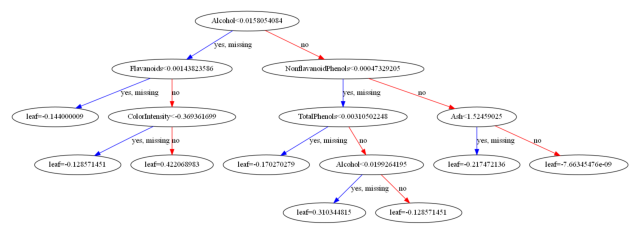

In [161]:
## Visualizing Boosting Trees
xgb.plot_tree(xgbclas,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

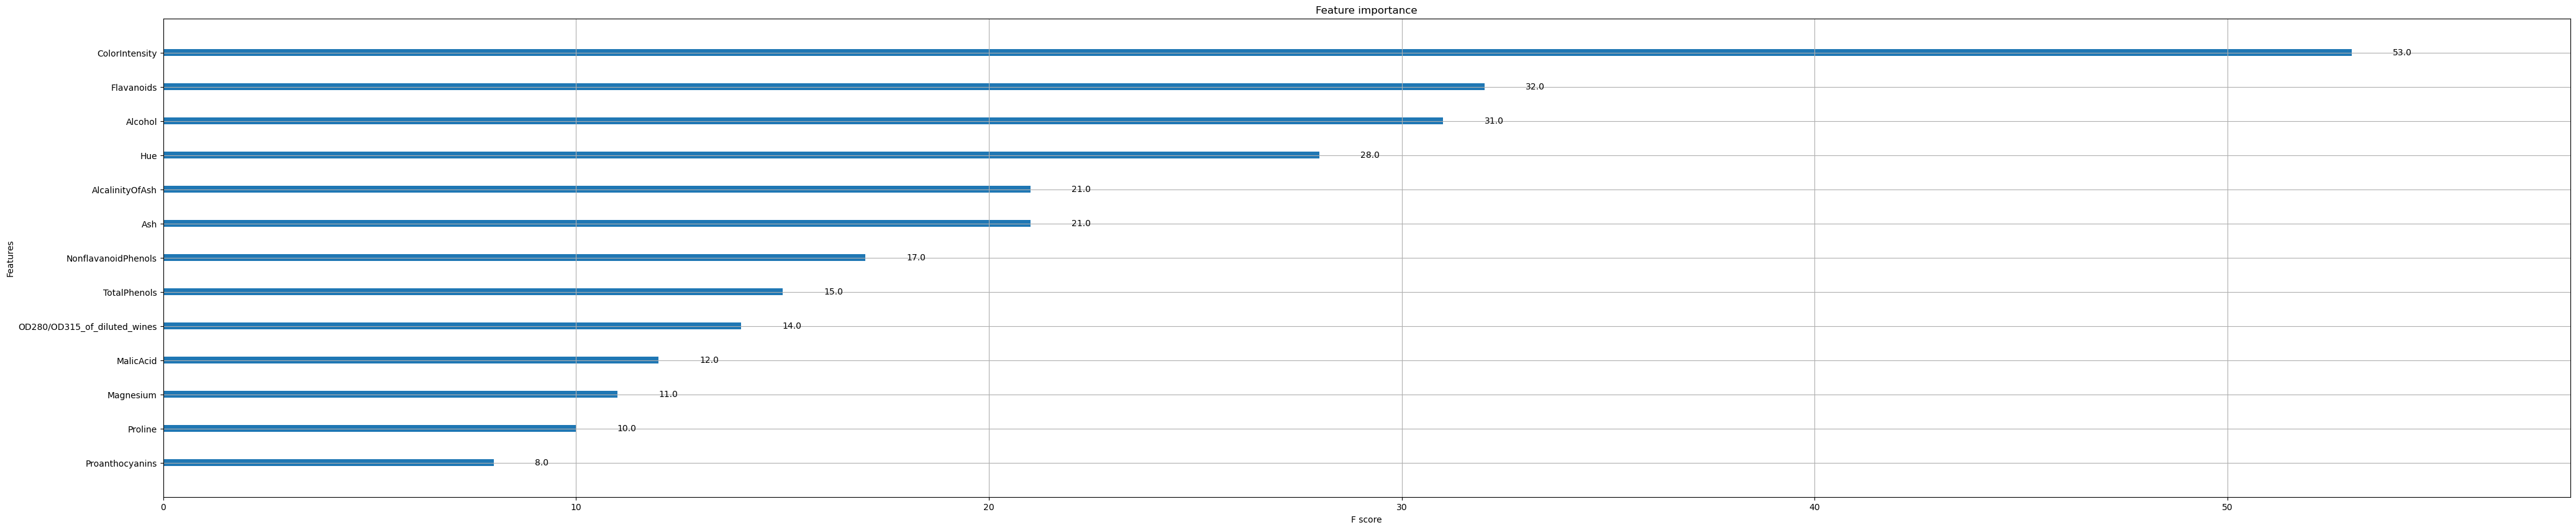

In [162]:
## Visualizing Feature importance
xgb.plot_importance(xgbclas)
plt.rcParams['figure.figsize'] = [8, 5]
plt.show()

### Exercici 2

<div class="alert alert-block alert-info">Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades 
</div>

### Decission Tree Classifier

In [35]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))


Accuracy: 0.9074074074074074


In [36]:
acc = dtc.score(X_test, y_test)
acc

0.9074074074074074

- Veiem que les dues mètriques ens donen el mateix, podem utilitzar qualsevol de les dos!



- Plotejo la confusion màtrix, i posteriorment el classification report on apareixen les mètriques que ens quantifiquen la confussion Matrix


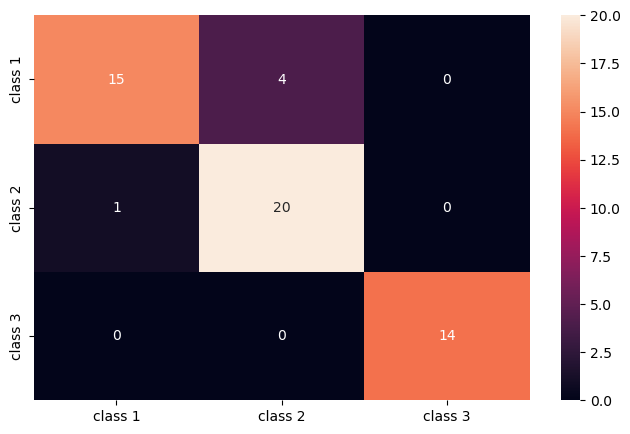

In [38]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_dtc), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

- Veiem que de la classe 1 la majoria s'han predit bé, 15, tot i així, hi ha 4 falsos positius que s'ha endut la classe2 i 1 fals negatiu que també ha anat a la classe 2
- Les classes 2 i 3 tots son veritables positius

In [37]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           1       0.94      0.79      0.86        19
           2       0.83      0.95      0.89        21
           3       1.00      1.00      1.00        14

    accuracy                           0.91        54
   macro avg       0.92      0.91      0.92        54
weighted avg       0.91      0.91      0.91        54



- Aqui podem veure com cada classe li surten diferents valors de precisió, recall i f1, .
- Com que el f1, es un balanceig de les duies anterirors, ens pot doonar una idea general de com està actuant el model, en general per les 3 classes es veu froça bé.
- Per casos més especifics potser hauriem de mirar si ens interessa més maximitzar una o altre mètrica

### K-Nearest Neighbors

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.9074074074074074


In [42]:
acc = knn.score(X_test, y_test)
print(f'accuracy: {acc}')

accuracy: 0.9074074074074074


- Observem que és exactament el mateix valor que ens dona el model de Decission Tree Classifaier. Aquest es un dels motius per els quals la metrica de l'accuracy no ens diu molta cosa, simplement ho pasa tot dins un sac i no ens descriu les diferències.
- Mirant les confussión matrix de cada model i el classification report podem veure, que sí que té sentit que tinguin el mateix valor, ja que al final, la suma dels FN i FP de les classes dona 5 en els 2 casos.

              precision    recall  f1-score   support

           1       0.89      0.89      0.89        19
           2       0.95      0.86      0.90        21
           3       0.88      1.00      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54



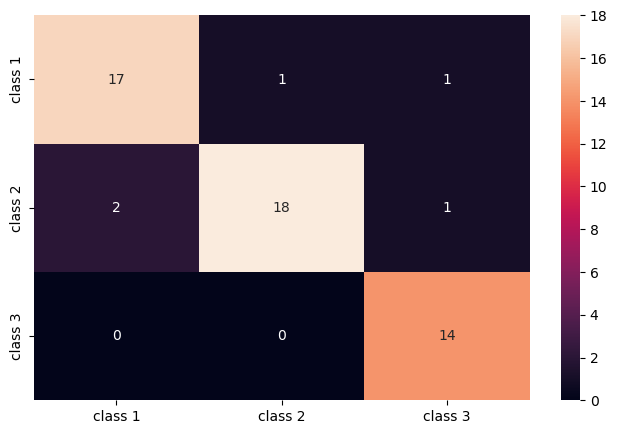

In [43]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_knn), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_knn))

- Com en el model anterior, el f1 surt foça bé en general
- Tot i així, en aquest model veiem que esl falsos negatius i positius també arriben a la classe 3 i ja no te un f1 de 1


### Super Vector Machine

In [44]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_svmc))


Accuracy: 0.9074074074074074


              precision    recall  f1-score   support

           1       0.94      0.84      0.89        19
           2       0.87      0.95      0.91        21
           3       0.93      0.93      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



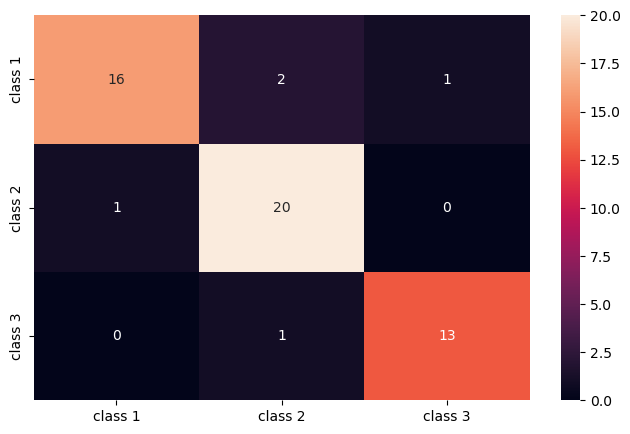

In [107]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svmc), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_svmc))

In [51]:
## Different metrics can also be called separetley:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred_svmc, average='weighted'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred_svmc, average='weighted'))

# Model f1 Score: harmonic mean of both precision and recall
print("f1_score:", metrics.f1_score(y_test, y_pred_svmc, average='weighted'))

Precision: 0.9100596760443308
Recall: 0.9074074074074074
f1_score: 0.9070332959221848


- Aquestes mètriques semblen una combinacio de les metriques dels models anteriror, tot i que ho fa millor el model que amb el KNN, el f1 de la classe 3 millora respecte KNN però no respecte DTC

### XGBoost

In [52]:
predictions = [round(value) for value in y_pred_xgbc]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 1.85%


In [53]:
print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.05      0.05      0.05        19
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        14

    accuracy                           0.02        54
   macro avg       0.01      0.01      0.01        54
weighted avg       0.02      0.02      0.02        54



C:\Users\crist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\crist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\crist\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\crist\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [55]:
confusion_matrix(y_test, y_pred_xgbc)

array([[ 0,  0,  0,  0],
       [18,  1,  0,  0],
       [ 1, 20,  0,  0],
       [ 0,  0, 14,  0]], dtype=int64)

- XGBooster és un algoritme principalement per dades Binaries, per  tant aqui no té sentit fer-lo servir

### Exercici 3

<div class="alert alert-block alert-info">Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció. 
</div>



- Faré aquest procés pels models de decision Tree i SVM

### Decision tree hyper parameters tunning

- Veiem que els parametres que més influencien en l'algoritme son:

   - **criterion** : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

   - **splitter** : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

   - **max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).
   
   

- Fem una grid de parametres amb aquests valors, la resta suposos que es queden en default, el parametre que generalement dona millors resultats

In [66]:
##Parameter grid

## criterion{“gini”, “entropy”, “log_loss”}, default=”gini”
criter = ['gini', 'entropy', 'log_loss']

# Method of selecting samples for training each tree
splitter = ["best", "random"]

# Maximum number of levels in tree
max_d = [*range(1, 21, 1)]

# Minimum sampled for leaf
min_samp_leaf = [5, 10, 20, 50, 100]


# Create the random grid
parametersGrid = {'criterion': criter,
               'splitter': splitter,
               'max_depth': max_d,
               'min_samples_leaf': min_samp_leaf}

In [77]:
y.describe()

count    178.000000
mean       1.938202
std        0.775035
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: Classes, dtype: float64

In [89]:
# Instantiate the grid search model
grid_search_dtc = GridSearchCV(estimator=dtc, 
                           param_grid=parametersGrid, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "f1_micro") ## optimizing for f1_micro because f1 itsels is not working well



- Per buscar els millors parametres, ho fem sobre tot el dataset.
- Desprès podrem extreure aquests parametres i provar-los sobre el set train i test per fer prediccions

In [90]:
grid_search_dtc.fit(X, y)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'splitter': ['best', 'random']},
             scoring='f1_micro', verbose=1)

In [91]:
grid_search_dtc.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 5,
 'splitter': 'best'}

In [88]:

score_dfc = pd.DataFrame(grid_search_dtc.cv_results_)
score_dfc.head()



mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.003694      0.000409         0.001556        0.000396   
1       0.003300      0.000402         0.002248        0.000847   
2       0.003376      0.001023         0.001729        0.000391   
3       0.002890      0.000500         0.001650        0.000529   
4       0.002434      0.000336         0.001864        0.000449   

  param_criterion param_max_depth param_min_samples_leaf param_splitter  \
0            gini               1                      5           best   
1            gini               1                      5         random   
2            gini               1                     10           best   
3            gini               1                     10         random   
4            gini               1                     20           best   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.527778   
1  {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.500000   
2  {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.527778   
3  {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.500000   
4  {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.527778   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.611111           0.638889           0.657143           0.685714   
1           0.583333           0.638889           0.657143           0.742857   
2           0.611111           0.638889           0.657143           0.685714   
3           0.583333           0.638889           0.657143           0.742857   
4           0.611111           0.638889           0.657143           0.685714   

   mean_test_score  std_test_score  rank_test_score  
0         0.624127        0.053951              432  
1         0.624444        0.080593              423  
2         0.624127        0.053951              432  
3         0.624444        0.080593              423  
4         0.624127        0.053951              432

### SVM hyper-parameters tunning

- Veiem que els parametres que més influencien en l'algoritme son:

    - KERNEL: function used to map data into a higher dimension in SVM+kernel, the idea is to transform the starting space (that of features) into a more complex one in which there is a hyperplane (hence something linear) separating the data

    - C: adjusts the amount of errors accepted for high C the error committed on the training data will weight more in the SVM objective function the model is then asked to fail less (i.e. to fit the learning data more), but obtaining a more complex interpolation (= model) interpolation (with the risk, if one exaggerates, of overfitting). vice versa, 
        - if C is low, the model considers less important  the error made on the learning data: the model will be simpler; 
        - if you overdo it, the risk is that of underfitting;  
        - if you think about it, if C is 0 I am ignoring the error I make on the learning data

    - GAMMA (for RBF kernel): adjusts the curvature of the margins thus limiting the influence of each individual sample gamma is proportional to the inverse of the standard deviation of the Gaussian "fitted" by the Gaussian kernel to each support vector

    - DEGREE (for POLY kernel): degree of the polynomial function

In [115]:
## Creat the parameters grid
## we should include the default values in each parameter
parameters = [
               {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
               {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": ['auto', 'scale']},
               {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1), "gamma": ['auto', 'scale']}
              ]
## Name de model
model = SVC()

# Instantiate the grid search model
grid_search_svm_clf = GridSearchCV(refit = True, estimator= model, param_grid=parameters, scoring = "f1_micro", cv=5, verbose=1 , n_jobs=-1)


In [116]:
grid_search_svm_clf.fit(X, y)

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'degree': array([1, 2, 3, 4]),
                          'gamma': ['auto', 'scale'], 'kernel': ['poly']}],
             scoring='f1_micro', verbose=1)

In [127]:
#create a table with the results of the combinations, sorting them from best to worst:
score_SVM = pd.DataFrame(grid_search_svm_clf.cv_results_)
score_SVM = score_SVM.sort_values(by="rank_test_score").set_index("rank_test_score")
int_cols = ["param_C", "param_kernel", "param_degree", "param_gamma", "mean_test_score"]
score_SVM[int_cols].head() # only look at the first 5


param_C param_kernel param_degree param_gamma  mean_test_score
rank_test_score                                                               
1                     1          rbf          NaN       scale         0.927143
2                   0.1          rbf          NaN       scale         0.921587
3                   100         poly            3        auto         0.915873
4                    10          rbf          NaN        auto         0.915714
5                     1         poly            3       scale         0.910159

In [118]:
grid_search_svm_clf.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

- Basicament obtenim que els millors parametres son els que hi ha per defecte, per tant esperem que el nou model am,b els millors parametres sigui igual al anterior.

In [119]:
# Create Decision Tree classifer object
svmc_best = svm.SVC(random_state = 42, C = 1, gamma = 'scale', kernel = 'rbf')

# Train Decision Tree Classifer# Train Decision Tree Classifer
svmc_best = svmc_best.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_svmc_best = svmc_best.predict(X_test)

              precision    recall  f1-score   support

           1       0.94      0.84      0.89        19
           2       0.87      0.95      0.91        21
           3       0.93      0.93      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



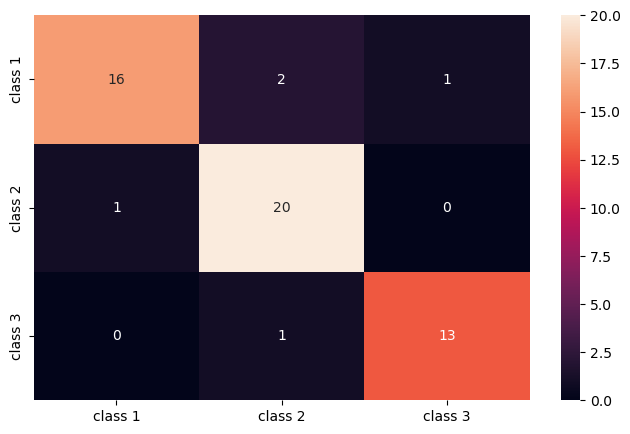

In [120]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svmc), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_svmc_best))

- Torno a mostrar els valors anterirors sense els millors parametres

              precision    recall  f1-score   support

           1       0.94      0.84      0.89        19
           2       0.87      0.95      0.91        21
           3       0.93      0.93      0.93        14

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54



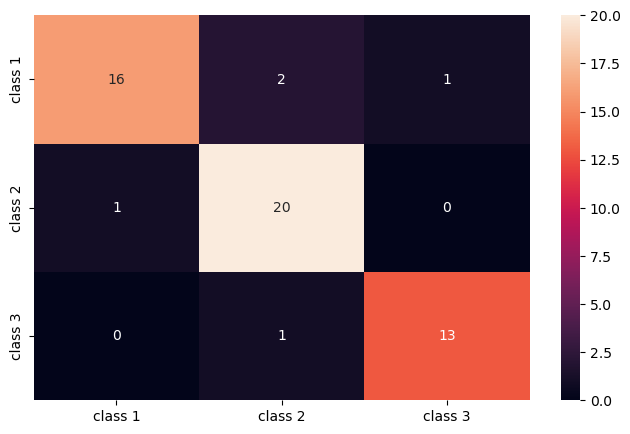

In [121]:
# Adding classes names for better interpretation
classes_names = ['class 1','class 2','class 3']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_svmc), 
                  columns=classes_names, index = classes_names)
                  
# Seaborn's heatmap to better visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');

print(classification_report(y_test, y_pred_svmc))

- Veiem que surt el mateix, ja que els parametres que hem posat nous eren els mateixo que els de per defecte

### Exercici 4

<div class="alert alert-block alert-info">Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation. 
</div>



- Per tal de fer aquesta comprovació, faré un cros validation amb tots els models que m'han donat resultats amb els set train/test, i despres amb totes les dades. Maximitzant a f1 ja que ara mateix vull un equilibri de mètriques

In [128]:
## Creat a list of the modles I want to check
models = []

models.append(("DecisionTree",DecisionTreeClassifier(random_state = 42)))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("svmc", svm.SVC(random_state = 42)))


In [129]:
models

[('DecisionTree', DecisionTreeClassifier(random_state=42)),
 ('KNeighbors', KNeighborsClassifier()),
 ('svmc', SVC(random_state=42))]

In [133]:
## Creat a loop to evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv= kfold, scoring='f1_micro')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

DecisionTree: 0.884615 (0.119410)
KNeighbors: 0.875641 (0.100631)
svmc: 0.942308 (0.064867)


In [134]:
## Creat a loop to evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv= kfold, scoring='f1_micro')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

DecisionTree: 0.916013 (0.044402)
KNeighbors: 0.903595 (0.077200)
svmc: 0.937255 (0.049124)


- Veiem que amb totes les dades obtenim millors f1 per decision Tree i KNN pero pitjors per SVM

### Exercici 5

<div class="alert alert-block alert-info">Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...) 
</div>

- Durant el preprocessat de les dades , abans de l'exercici 1, s'han fet diversos processos d'enginyeria per tal d'escalar les dades.
- Per tal de provar com funciona i veure si algun dels models millora, faré un balancejat de les dades
- Primer miro una mica més quines distribucions tenen les dades

In [138]:
## Median of the values per class
df.groupby('Classes').mean().round(3)

Alcohol  MalicAcid    Ash  AlcalinityOfAsh  Magnesium  TotalPhenols  \
Classes                                                                        
1         13.745      2.011  2.456           17.037    106.339         2.840   
2         12.279      1.933  2.245           20.238     94.549         2.259   
3         13.154      3.334  2.437           21.417     99.312         1.679   

         Flavanoids  NonflavanoidPhenols  Proanthocyanins  ColorIntensity  \
Classes                                                                     
1             2.982                0.290            1.899           5.528   
2             2.081                0.364            1.630           3.087   
3             0.781                0.448            1.154           7.396   

           Hue  OD280/OD315_of_diluted_wines   Proline  
Classes                                                 
1        1.062                         3.158  1115.712  
2        1.056                         2.785   519.507  
3        0.683                         1.684   629.896

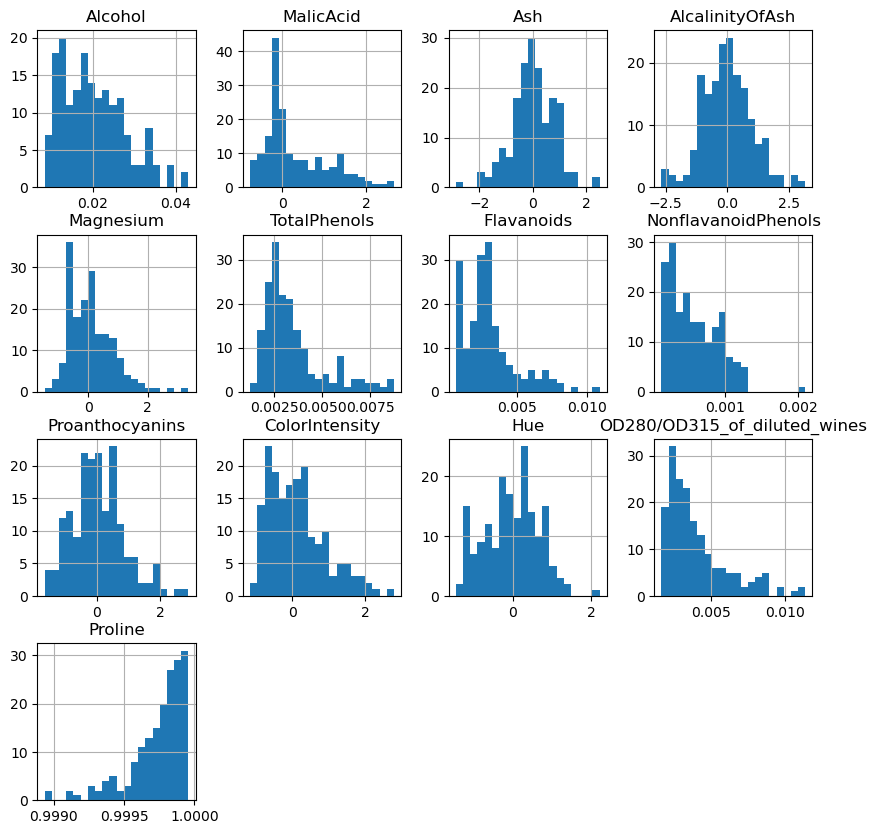

In [144]:
## Feature distribution
X.hist(bins=20, figsize=(10, 10))
plt.show()

- Procedeixo a fer un balancejat de les dades per veure si milloren els resultats de la predicció

In [149]:
## Importing necessary modul to balance the data
#from imblearn.over_sampling import RandomOverSampler

# Instanciate de balancer sampler
ros = RandomOverSampler()

## Re-sample de features and targets balancely
X_resampled, y_resampled = ros.fit_resample(X, y)

- Aqui plottegio el abans i el desprès del resamplegat amb balanceig de el target

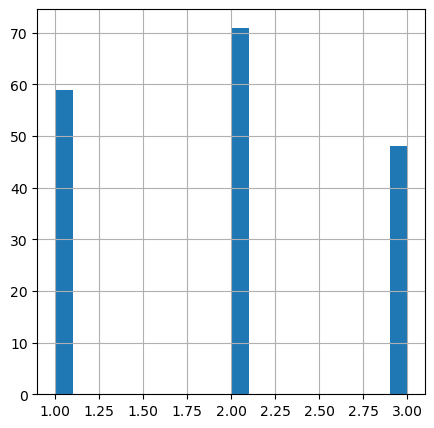

In [157]:
y.hist(bins=20, figsize=(5, 5))
plt.show()

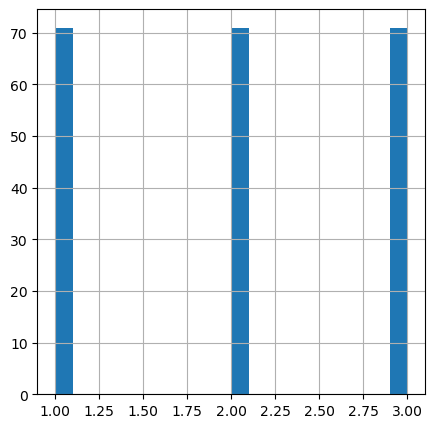

In [158]:
y_resampled.hist(bins=20, figsize=(5, 5))
plt.show()

- Veiem clarament que ens ha fet el proces bé, ara totes les classes tenen un numero molt semblant de dades.


- Ara torno ha aplicar una cros validation amb tots els models per veure si alguns d'ells surt millor amb aquest balanceig

In [152]:
## Creat a loop to evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_resampled, y_resampled, cv= kfold, scoring='f1_micro')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

DecisionTree: 0.920130 (0.056122)
KNeighbors: 0.900649 (0.054719)
svmc: 0.933983 (0.052889)


- Resultats sense balanceix de la cross-validation
    - DecisionTree: 0.916013 (0.044402)
    - KNeighbors: 0.903595 (0.077200)
    - svmc: 0.937255 (0.049124)


- Comparant amb els resultats anteriros el model de decision Tree amb aquest balanceix dona una f1 millor, ara tenim 0.92, però tant el SVM com el KNN surten un pel pitjos.
